In [106]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

In [107]:
I = Image.open('descarga.png')

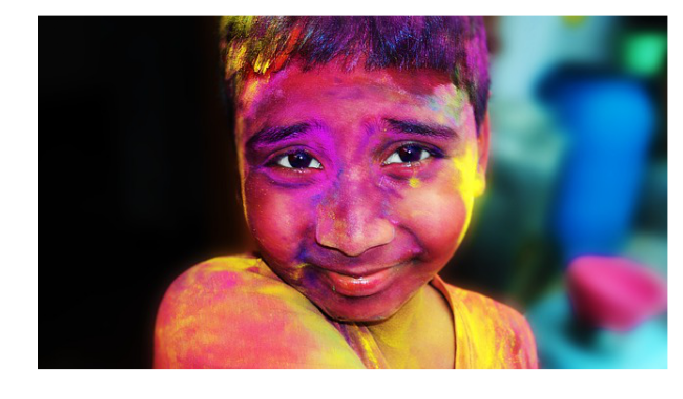

In [108]:
I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In [109]:
R = np.array(I1[:,:,0])
G = I1[:,:,1]
B = I1[:,:,2]

dimension = R.shape

In [136]:
X = pd.DataFrame(np.concatenate((R.reshape((-1, 1)), G.reshape((-1, 1)), B.reshape((-1, 1))),axis=1))

In [137]:
n = 10
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [139]:
XR = np.empty(etiquetas.shape[0])
XG = np.empty(etiquetas.shape[0])
XB = np.empty(etiquetas.shape[0])
for i in range(etiquetas.shape[0]):
  XR[i] = centroides[etiquetas[i]][0]
  XG[i] = centroides[etiquetas[i]][1]
  XB[i] = centroides[etiquetas[i]][2]

XR.shape = dimension
XG.shape = dimension
XB.shape = dimension

XR.reshape(dimension)
XG.reshape(dimension)
XB.reshape(dimension)

XR = XR[:, :, np.newaxis]  
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]

Y = np.concatenate((XR,XG,XB),axis=2)

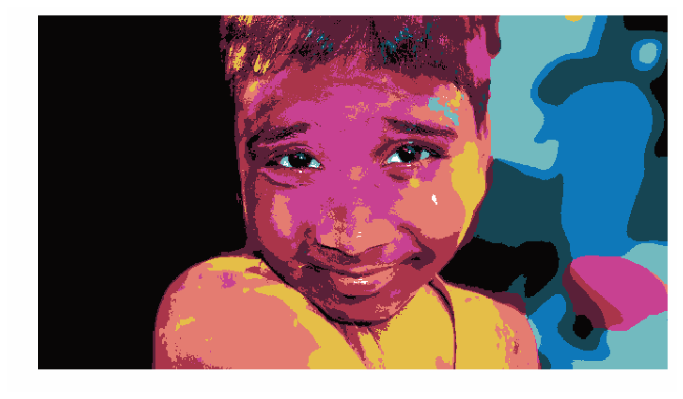

In [135]:
plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()